## Logistic Growth
In the previous notebook, we explored linear and exponential growth. In both cases, growth goes on forever -- a situation that doesn't typically happen for example since bacteria run out of food. So lets walk through such an example:

 * the food initially available is $C_0$
 * division of a bacterium requires $x$ amount of food. Hence there can at most by $N = C_0/x$ new bacteria at the end
 * the food remaining after time $t$ is $C(t) = C_0 - x\times(n(t)-n_0)$.
 * lets assume the rate of division decreases proportionally with the available food $\frac{C(t)}{C_0\tau}$
 
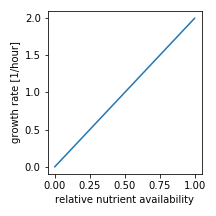

With these assumptions and definitions, we find a difference equation

$$
\begin{split}
n(t+\Delta t) & = n(t) + \Delta t\times  n(t)\times \frac{C(t)}{C_0\tau} \\
&= n(t) + \Delta t\times \frac{n(t)}{\tau}\times \left(1- \frac{x(n(t) - n_0)}{C_0}\right) \\
&= n(t) + \Delta t\times \frac{n(t)}{\tau}\times \left(1- \frac{n(t) - n_0}{N}\right)
\end{split}
$$

Rearranging this into a differential equation in the usual way results in 

$$
\lim_{\Delta t \to 0} \frac{n(t+\Delta t) - n(t)}{\Delta t}  = \frac{dn(t)}{dt} = \frac{n(t)}{\tau}\times \left(1- \frac{n(t) - n_0}{N}\right)
$$

This can be further simplified by realizing that whenever it matters, the $n(t)\gg n_0$ so that we can simply drop $n_0$ from the right hand side to obtain the standard logistic differential equation:

<font color='red'>
$$
\frac{dn(t)}{dt} = \frac{n(t)}{\tau}\left(1- \frac{n(t)}{N}\right)
$$
</font>
    Here $N$ is often called carrying capacity. 

Before we start solving this equation, lets look at the case $n(t)\ll N$!

In this case, the equation simplifies

$$
\frac{dn(t)}{dt} = \frac{n(t)}{\tau}\left(1- n(t)/N\right) \approx \frac{n(t)}{\tau}
$$

This is simply exponential growth like we have seen before, but we expect this approximation only to be valid while

$$
n(t)\approx n_0 e^{t/\tau} \ll N
$$

In [1]:
# define function that return derivative
def dndt(n, tau, N):
    return n/tau*(1-n/N)

In [2]:
tau = 30 # division time of 30 minutes
N = 100
n_0 = 1
n = [n_0]
t = [0]
Delta_t = 0.1
tmax = 10*tau
for i in range(int(tmax//Delta_t)):  # number of steps necessary is tmax divided by step size = tmax/Delta_t
    n.append(n[i] + Delta_t * dndt(n[i],tau,N))
    t.append(t[i] + Delta_t)

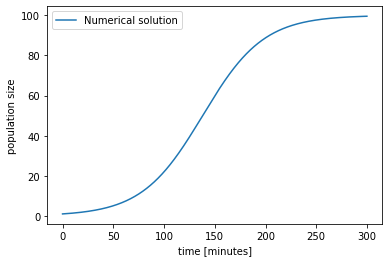

In [3]:
import matplotlib.pyplot as plt
plt.plot(t, n, label=f"Numerical solution")
plt.xlabel("time [minutes]")
plt.ylabel("population size")
plt.legend()

The logistic equation has an exact solution:

$$
n(t) = N\frac{e^{t/\tau}}{N/n_0 - 1 + e^{t/\tau}}
$$

At $t=0$ we have $n(0) = n_0$ as it has to be. At very large $t$, the solution tends to $N$. 

The solution to the logistic equation can be parameterized in different ways and we'll explore these more in the exercises. 


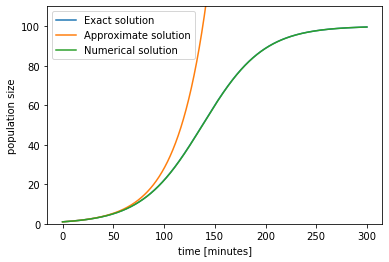

In [4]:
import numpy as np
def logistic(t, tau, n_0, N):
    t_arr = np.array(t)
    return N*np.exp(t_arr/tau)/(N/n_0-1+np.exp(t_arr/tau))

plt.plot(t, logistic(t,tau, n_0,N), label="Exact solution")
plt.plot(t, n_0*np.exp(np.array(t)/tau), label="Approximate solution")
plt.plot(t, n, label=f"Numerical solution")
plt.xlabel("time [minutes]")
plt.ylabel("population size")
plt.ylim(0,N*1.1)
plt.legend()

### Dig deeper
 * change $\tau$, $n_0$, and $N$ in the above graphs and explore how the results change.
 * verify the solution to the logistic equation.
 * graph the output on a logarithmic scale.